## 3. Scaling Features in the Wine Quality Dataset
   - Task: Apply normalization and standardization to the features in the Wine Quality dataset. Analyze how scaling affects the distribution of data.
   - Dataset: Wine Quality Dataset


## Loading Data

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [16]:
df = pd.read_csv('/kaggle/input/wine-quality-dataset/WineQT.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


## Normalization

In [17]:

# Initialize the scalabser
scaler = MinMaxScaler()

# Apply normalization to the features
wine_data_normalized = df.copy()
wine_data_normalized.iloc[:, :-1] = scaler.fit_transform(wine_data_normalized.iloc[:, :-1])

# Display the first few rows of the normalized dataset
wine_data_normalized.head()


/tmp/ipykernel_33/1159874296.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.4 0.4 0.4 ... 0.4 0.6 0.4]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  wine_data_normalized.iloc[:, :-1] = scaler.fit_transform(wine_data_normalized.iloc[:, :-1])


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,0.247788,0.397260,0.00,0.068493,0.106845,0.149254,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,0
1,0.283186,0.520548,0.00,0.116438,0.143573,0.358209,0.215548,0.494126,0.362205,0.209581,0.215385,0.4,1
2,0.283186,0.438356,0.04,0.095890,0.133556,0.208955,0.169611,0.508811,0.409449,0.191617,0.215385,0.4,2
3,0.584071,0.109589,0.56,0.068493,0.105175,0.238806,0.190813,0.582232,0.330709,0.149701,0.215385,0.6,3
4,0.247788,0.397260,0.00,0.068493,0.106845,0.149254,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,4


## Standardization

In [18]:

# Initialize the scaler
scaler = StandardScaler()

# Apply standardization to the features
wine_data_standardized = df.copy()
wine_data_standardized.iloc[:, :-1] = scaler.fit_transform(wine_data_standardized.iloc[:, :-1])

# Display the first few rows of the standardized dataset
wine_data_standardized.head()


/tmp/ipykernel_33/996804101.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.81572437 -0.81572437 -0.81572437 ... -0.81572437  0.42578423
 -0.81572437]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  wine_data_standardized.iloc[:, :-1] = scaler.fit_transform(wine_data_standardized.iloc[:, :-1])


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,-0.521580,0.939332,-1.365027,-0.466421,-0.231395,-0.450467,-0.363610,0.555854,1.270695,-0.573658,-0.963382,-0.815724,0
1,-0.292593,1.941813,-1.365027,0.050060,0.234247,0.915920,0.643477,0.036165,-0.708928,0.130881,-0.593601,-0.815724,1
2,-0.292593,1.273492,-1.161568,-0.171289,0.107253,-0.060071,0.246745,0.140103,-0.325775,-0.045254,-0.593601,-0.815724,2
3,1.653789,-1.399789,1.483400,-0.466421,-0.252560,0.135127,0.429852,0.659792,-0.964363,-0.456235,-0.593601,0.425784,3
4,-0.521580,0.939332,-1.365027,-0.466421,-0.231395,-0.450467,-0.363610,0.555854,1.270695,-0.573658,-0.963382,-0.815724,4


## Feature Comparision

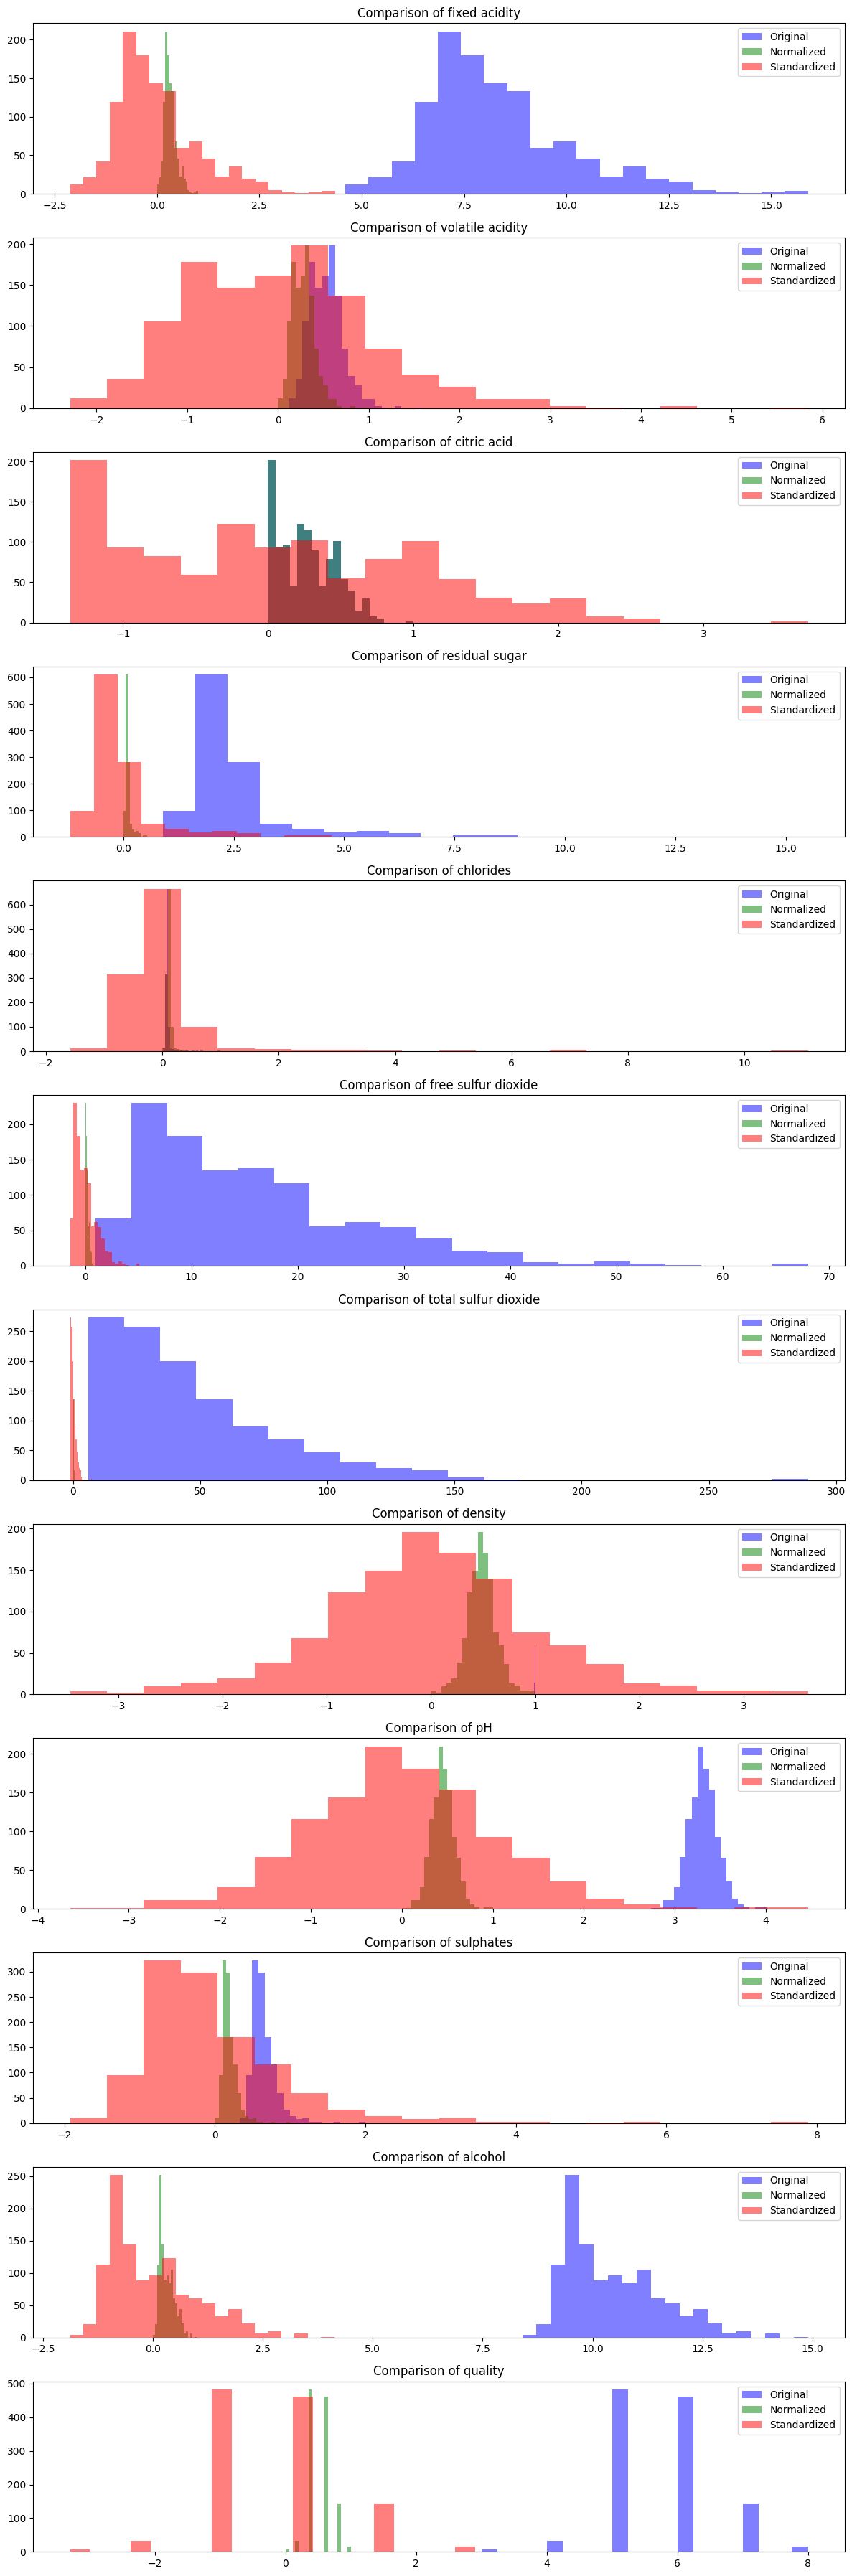

In [19]:

# List of feature columns
features = df.columns[:-1]

# Create subplots for each feature
fig, axes = plt.subplots(nrows=len(features), ncols=1, figsize=(12, 3 * len(features)))

for i, feature in enumerate(features):
    ax = axes[i]
    
    # Plot histogram for the original data
    ax.hist(df[feature], bins=20, alpha=0.5, label='Original', color='blue')
    
    # Plot histogram for the normalized data
    ax.hist(wine_data_normalized[feature], bins=20, alpha=0.5, label='Normalized', color='green')
    
    # Plot histogram for the standardized data
    ax.hist(wine_data_standardized[feature], bins=20, alpha=0.5, label='Standardized', color='red')
    
    ax.set_title(f'Comparison of {feature}')
    ax.legend(loc='upper right')

plt.tight_layout()
plt.show()
